# Part 2: Gate Basis
---

Quantum computers can implement only a set of gates that, with transformations, can represent any other possible gate. This set of gates is called the Gate Basis of the QPU. Build a function that transforms a general Quantum Circuit to the following gate basis: {CX,ID,RZ,SX,X}

> Please check Decompositions.ipynb before going through this file to take a look at the functions used for decomposing the gates.

In [1]:
import pennylane as qml
from pennylane import numpy as np
from helper_func import *

In [2]:
ops = [
    qml.RX(0.2, wires=0),
    qml.CNOT(wires=[0, 1]),
    qml.Hadamard(wires=2),
    qml.RY(np.pi / 4, wires=1),
    qml.SWAP(wires=[0, 1])
]

measurements = [
    qml.state()
]

Decompose the list of operations to the target basis using the ```Gate``` class.

In [3]:
decomposed_gates = decompose_pennylane_ops(ops)
decomposed_gates_list = get_decomposed_gates(decomposed_gates)
result = convert_gates_to_pennylane_circuit(decomposed_gates_list, return_type='state')
tape = qml.tape.QuantumTape(result.operations, measurements)
circuit = tape.circuit
# print(circuit) # print to see decomposed gates

Convert this list of decomposed operations into a pennylane circuit which can be simulated.

In [4]:
dev = qml.device("default.qubit", wires=3)
statevector = qml.execute([tape], dev)[0]
num_wires = 3
quantum_circuit = create_circuit_from_operations(result.operations, num_wires, dev)

Circuit with the decomposed operations:

(<Figure size 1500x400 with 1 Axes>, <Axes: >)

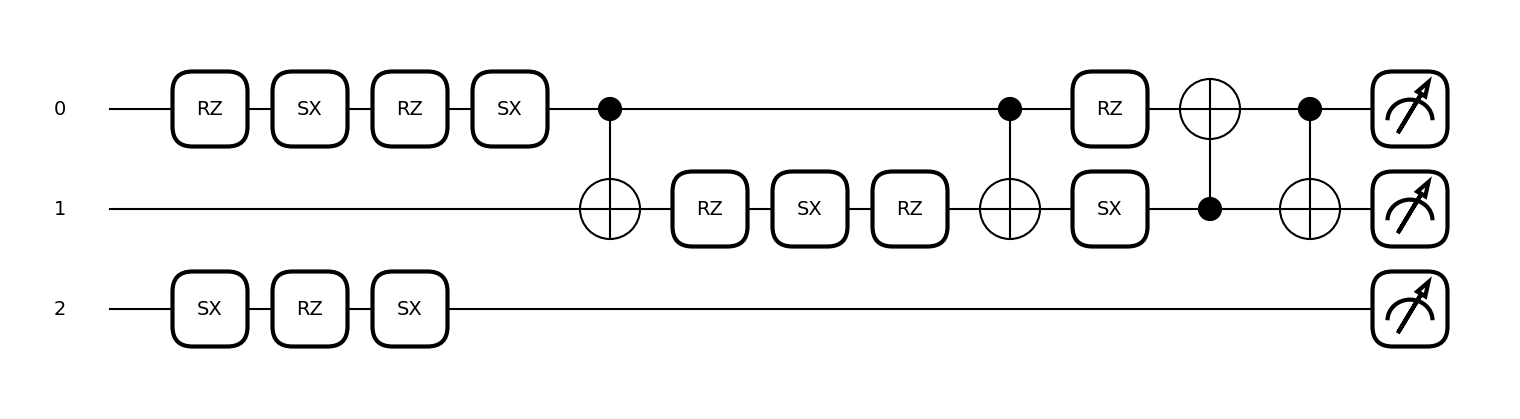

In [5]:
compiled_circuit = qml.compile(quantum_circuit)
qml.draw_mpl(compiled_circuit)()

Proceed to Part_3.ipynb